In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\sudee\Downloads\laptop_details.csv")
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df.duplicated().value_counts()

False    423
True     297
dtype: int64

In [4]:
df['MRP']=df['MRP'].str.replace('₹','')
df['MRP']=df['MRP'].str.replace(',','')
df['MRP']=df['MRP'].astype('float64')
df['MRP'].head()

0    36990.0
1    39990.0
2    32990.0
3    49990.0
4    49990.0
Name: MRP, dtype: float64

In [5]:
print(df['Feature'][100])
print(df['Product'][100])

Intel Core i7 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 Inch) Display2 Year Carry-In Warranty Term
MSI Core i7 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce RTX 3050/144 Hz) ...


In [6]:
import re
pattern=r'(?:AMD|Intel|M1|Apple|Qualcomm Snapdragon)[\s\w]+Processor'
# pattern=r'[\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(pattern, x))

In [7]:
df['Processor'].value_counts()

[Intel Core i5 Processor]                                 157
[Intel Core i3 Processor]                                 133
[AMD Ryzen 9 Octa Core Processor]                          87
[AMD Ryzen 7 Octa Core Processor]                          80
[Intel Core i7 Processor]                                  56
[AMD Ryzen 5 Hexa Core Processor]                          52
[AMD Ryzen 3 Dual Core Processor]                          43
[AMD Ryzen 5 Quad Core Processor]                          37
[Intel Celeron Dual Core Processor]                        20
[Intel Core i9 Processor]                                  11
[Apple M1 Processor]                                        7
[Apple M1 Pro Processor]                                    6
[Apple M2 Processor]                                        5
[AMD Ryzen 3 Quad Core Processor]                           4
[Intel Celeron Quad Core Processor]                         3
[Intel Pentium Silver Processor]                            3
[Intel P

In [8]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))

In [9]:
pattern=r'^(?:AMD Ryzen|Intel|Apple)'
df['Processor_type'] = df['Processor'].apply(lambda x : re.findall(pattern, x))

In [10]:
df['Processor_type'].value_counts()

[Intel]        390
[AMD Ryzen]    307
[Apple]         19
[]               4
Name: Processor_type, dtype: int64

In [11]:
df.Processor_type = df.Processor_type.apply(lambda x : ''.join(x))
index_names = df[ df['Processor_type'] ==''].index

df.drop(index_names, inplace = True)
df['Processor_type'].value_counts()

Intel        390
AMD Ryzen    307
Apple         19
Name: Processor_type, dtype: int64

In [12]:
pattern=r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(pattern, x))

In [13]:
df.RAM.value_counts()

[8 GB DDR4 RAM]                                                                                               375
[16 GB DDR4 RAM]                                                                                              153
[16 GB DDR5 RAM]                                                                                               77
[4 GB DDR4 RAM]                                                                                                25
[16 GB LPDDR4X RAM]                                                                                            16
[8 GB LPDDR4X RAM]                                                                                             16
[32 GB DDR5 RAM]                                                                                               11
[16 GB LPDDR5 RAM]                                                                                              9
[4 GB LPDDR4 RAM]                                                                       

In [14]:
index_names = df[ df['RAM'] == '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM, 8 GB DDR4 RAM'].index

df.drop(index_names, inplace = True)

In [15]:
df.RAM.value_counts()

[8 GB DDR4 RAM]                                                                                               375
[16 GB DDR4 RAM]                                                                                              153
[16 GB DDR5 RAM]                                                                                               77
[4 GB DDR4 RAM]                                                                                                25
[16 GB LPDDR4X RAM]                                                                                            16
[8 GB LPDDR4X RAM]                                                                                             16
[32 GB DDR5 RAM]                                                                                               11
[16 GB LPDDR5 RAM]                                                                                              9
[4 GB LPDDR4 RAM]                                                                       

In [16]:
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df['RAM_GB']=df['RAM'].str[0:2]

In [17]:
df.RAM_GB.value_counts()

8     400
16    263
4      35
32     17
12      1
Name: RAM_GB, dtype: int64

In [18]:
pattern=r'(?:DDR4|DDR5|LPDDR4X|LPDDR5|Unified Memory|LPDDR4|LPDDR4X|LPDDR3)'

df['RAM_type'] = df['Feature'].apply(lambda x : re.findall(pattern, x))

In [19]:
df.RAM_type = df.RAM_type.apply(lambda x : ''.join(x))

df.RAM_type.value_counts()

DDR4              549
DDR5               92
LPDDR4X            36
Unified Memory     12
LPDDR5              9
DDR4DDR4            8
LPDDR4              8
DDR4DDR5DDR4        1
LPDDR3              1
Name: RAM_type, dtype: int64

In [20]:
df['RAM_type']=df['RAM_type'].replace('DDR4DDR4','DDR4')
df['RAM_type']=df['RAM_type'].replace('DDR4DDR5DDR4','DDR4')

In [21]:
pattern=r'\d+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(pattern, x))
df['Storage'].head()

0    [256 GB SSD]
1    [512 GB SSD]
2    [512 GB SSD]
3    [512 GB SSD]
4    [512 GB SSD]
Name: Storage, dtype: object

In [22]:
df['Storage'].value_counts()

[512 GB SSD]                          374
[1 TB SSD]                            176
[256 GB SSD]                           97
[1 TB HDD, 256 GB SSD]                 26
[1 TB HDD]                             16
[]                                      9
[2 TB SSD]                              7
[128 GB SSD]                            6
[1 TB HDD, 512 GB SSD]                  2
[128 GB SSD, 1 TB HDD, 128 GB SSD]      2
[256 GB HDD, 256 GB SSD]                1
Name: Storage, dtype: int64

In [23]:
# for i in range(df.shape[0]):
#     if df['Storage'][i]==[]:
#         df[i].drop()
# df.drop[df['Storage']==[]]
df.Storage = df.Storage.apply(lambda x : ''.join(x))

index_names = df[ df['Storage'] == ''].index

df.drop(index_names, inplace = True)

In [24]:
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df['Storage'].value_counts()

512 GB SSD                      374
1 TB SSD                        176
256 GB SSD                       97
1 TB HDD256 GB SSD               26
1 TB HDD                         16
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [25]:
df['Disk_Type'] = df['Storage'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )
df['Disk_Type'].value_counts()

SSD    660
HDD     47
Name: Disk_Type, dtype: int64

In [26]:
df['Disk_size']=df['Storage'].str.split().str[0]
df['Disk_size']=df['Disk_size'].replace('1','1024').replace('2','2048')
df['Disk_size'].value_counts()

512     374
1024    220
256      98
128       8
2048      7
Name: Disk_size, dtype: int64

In [27]:
df['Disk_size'].astype('int')
df['Disk_size'].value_counts()

512     374
1024    220
256      98
128       8
2048      7
Name: Disk_size, dtype: int64

In [28]:
pattern=r'(?:Windows|DOS|Chrome|Mac)[\w\s]+Operating System'
df['OS'] = df['Feature'].apply(lambda x : re.findall(pattern, x))
df['OS'].value_counts()

[Windows 11 Operating System]                                                                                555
[Windows 10 Operating System]                                                                                126
[Mac OS Operating System]                                                                                     19
[DOS Operating System]                                                                                         4
[Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System]      1
[Windows 10 Operating System, Windows 10 Operating System]                                                     1
[Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System]      1
Name: OS, dtype: int64

In [29]:
df.OS = df.OS.apply(lambda x : ''.join(x))
df.drop(df[df['OS']=='Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System'].index,inplace = True)
df.drop(df[df['OS']=='Windows 10 Operating SystemWindows 10 Operating System'].index,inplace = True)
df.drop(df[df['OS']=='Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System'].index,inplace = True)

In [30]:
df['OS'].value_counts()

Windows 11 Operating System    555
Windows 10 Operating System    126
Mac OS Operating System         19
DOS Operating System             4
Name: OS, dtype: int64

In [31]:
pattern=r'(?:SSD|HDD)\d+[(\w\s).]+Display'
df['Display'] = df['Feature'].apply(lambda x : re.findall(pattern, x))
df['Display'].value_counts()

[SSD39.62 cm (15.6 inch) Display]                  338
[SSD39.62 cm (15.6 Inch) Display]                  130
[SSD35.56 cm (14 inch) Display]                     83
[SSD35.56 cm (14 Inch) Display]                     26
[SSD35.56 cm (14 inch) Touchscreen Display]         12
[HDD39.62 cm (15.6 inch) Display]                   10
[SSD40.64 cm (16 Inch) Display]                      8
[SSD33.78 cm (13.3 inch) Display]                    7
[SSD33.78 cm (13.3 Inch) Display]                    6
[SSD40.64 cm (16 inch) Display]                      6
[SSD35.56 cm (14 Inch) Touchscreen Display]          6
[SSD43.94 cm (17.3 Inch) Display]                    6
[SSD34.04 cm (13.4 Inch) Touchscreen Display]        5
[SSD40.89 cm (16.1 inch) Display]                    5
[SSD41.15 cm (16.2 inch) Display]                    5
[SSD43.94 cm (17.3 inch) Display]                    5
[SSD39.62 cm (15.6 inches) Display]                  5
[SSD38.1 cm (15 inch) Display]                       4
[HDD35.56 

In [32]:
df.Display = df.Display.apply(lambda x : ''.join(x))
df.Display=df.Display.str.replace('SSD','')
df.Display=df.Display.str.replace('HDD','')

In [33]:
df['Display'].value_counts()

39.62 cm (15.6 inch) Display                  348
39.62 cm (15.6 Inch) Display                  130
35.56 cm (14 inch) Display                     87
35.56 cm (14 Inch) Display                     26
35.56 cm (14 inch) Touchscreen Display         12
40.64 cm (16 Inch) Display                      8
33.78 cm (13.3 inch) Display                    7
35.56 cm (14 Inch) Touchscreen Display          6
33.78 cm (13.3 Inch) Display                    6
40.64 cm (16 inch) Display                      6
43.94 cm (17.3 Inch) Display                    6
34.04 cm (13.4 Inch) Touchscreen Display        5
39.62 cm (15.6 inches) Display                  5
43.94 cm (17.3 inch) Display                    5
41.15 cm (16.2 inch) Display                    5
40.89 cm (16.1 inch) Display                    5
35.81 cm (14.1 inch) Display                    4
38.1 cm (15 inch) Display                       4
40.89 cm (16.1 Inch) Display                    3
34.54 cm (13.6 Inch) Display                    3


In [34]:
df['Display_cm']=df['Display'].str[0:5]

In [35]:
df['Display_cm'].value_counts()

39.62    486
35.56    132
33.78     18
40.64     16
43.94     11
40.89      8
34.04      5
41.15      5
35.81      4
38.1       4
29.46      4
34.54      3
88.9       2
36.07      2
33.02      1
38.0       1
34.29      1
42.16      1
Name: Display_cm, dtype: int64

In [36]:
pattern= r'(\d+(?:\.\d+)?)'
df['Display_size'] = df['Display'].apply(lambda x : re.findall(pattern, x))

In [37]:
df['Display_inches']=df['Display_size'].str[1]

In [38]:
df['Display_inches'].value_counts()

15.6     486
14       132
13.3      18
16        16
17.3      11
16.1       8
13.4       5
16.2       5
14.1       4
15         4
11.6       4
13.6       3
35         2
14.2       2
13         1
14.96      1
13.5       1
16.6       1
Name: Display_inches, dtype: int64

In [39]:
df['Display_inches']=df['Display_inches'].replace('35','14')

In [40]:
df['Display_inches'].value_counts()

15.6     486
14       134
13.3      18
16        16
17.3      11
16.1       8
13.4       5
16.2       5
14.1       4
15         4
11.6       4
13.6       3
14.2       2
13         1
14.96      1
13.5       1
16.6       1
Name: Display_inches, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 719
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product         704 non-null    object 
 1   Rating          567 non-null    float64
 2   MRP             704 non-null    float64
 3   Feature         704 non-null    object 
 4   Processor       704 non-null    object 
 5   Processor_type  704 non-null    object 
 6   RAM             704 non-null    object 
 7   RAM_GB          704 non-null    object 
 8   RAM_type        704 non-null    object 
 9   Storage         704 non-null    object 
 10  Disk_Type       704 non-null    object 
 11  Disk_size       704 non-null    object 
 12  OS              704 non-null    object 
 13  Display         704 non-null    object 
 14  Display_cm      704 non-null    object 
 15  Display_size    704 non-null    object 
 16  Display_inches  704 non-null    object 
dtypes: float64(2), object(15)
memory us

In [42]:
df=df.drop(columns =['Processor','Storage','Rating','Product','Display','Display_size'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 719
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MRP             704 non-null    float64
 1   Feature         704 non-null    object 
 2   Processor_type  704 non-null    object 
 3   RAM             704 non-null    object 
 4   RAM_GB          704 non-null    object 
 5   RAM_type        704 non-null    object 
 6   Disk_Type       704 non-null    object 
 7   Disk_size       704 non-null    object 
 8   OS              704 non-null    object 
 9   Display_cm      704 non-null    object 
 10  Display_inches  704 non-null    object 
dtypes: float64(1), object(10)
memory usage: 66.0+ KB


UNIVARIENT ANALYSIS

In [44]:
#MRP
df['MRP'].describe()

count       704.000000
mean      82674.082386
std       61700.198394
min       15990.000000
25%       39990.000000
50%       59990.000000
75%       96512.250000
max      434830.000000
Name: MRP, dtype: float64

<AxesSubplot:>

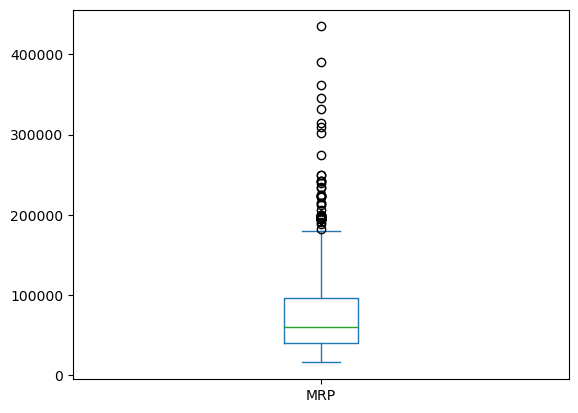

In [45]:
df['MRP'].plot(kind='box')

<AxesSubplot:>

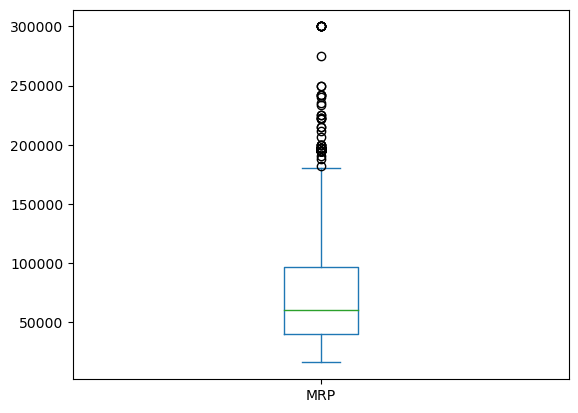

In [46]:
 df['MRP']=np.where(df['MRP'] >300000.0,300000.0,df['MRP'])
df['MRP'].plot(kind='box')

In [47]:
# df['MRP']= df['MRP'].apply(np.log1p)

In [48]:
#df['MRP'].plot(kind='box')

<AxesSubplot:>

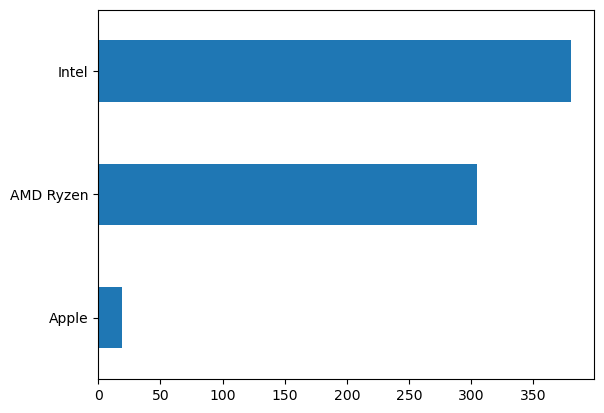

In [49]:
#PROCESSOR
df['Processor_type'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

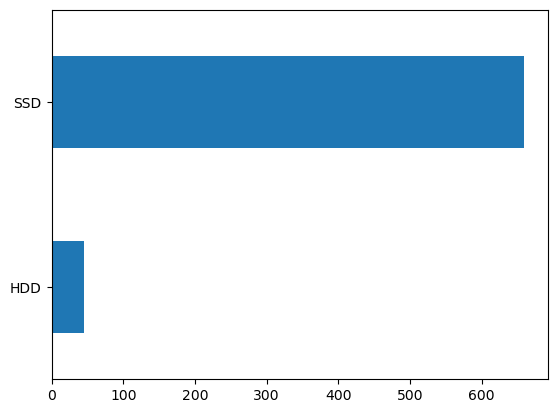

In [50]:
#STORAGE
df['Disk_Type'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

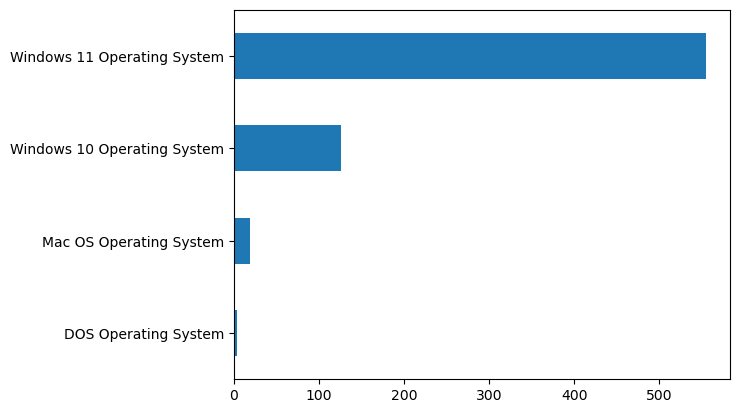

In [51]:
#OS
df['OS'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

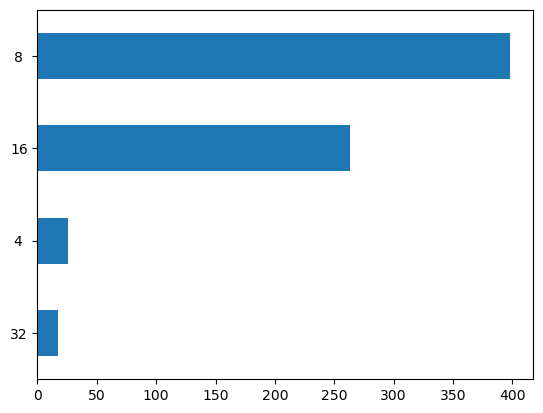

In [52]:
#RAM_SIZE
df['RAM_GB'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

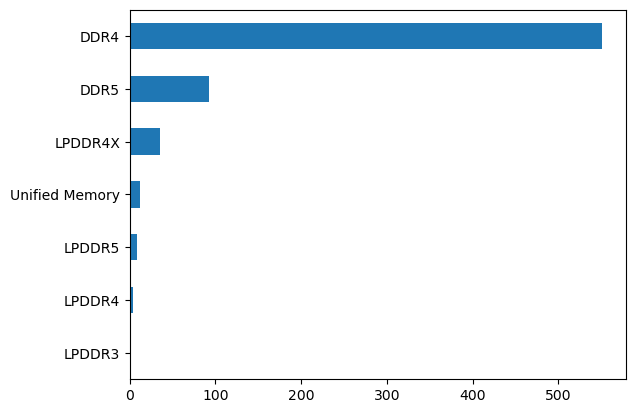

In [53]:
df['RAM_type'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

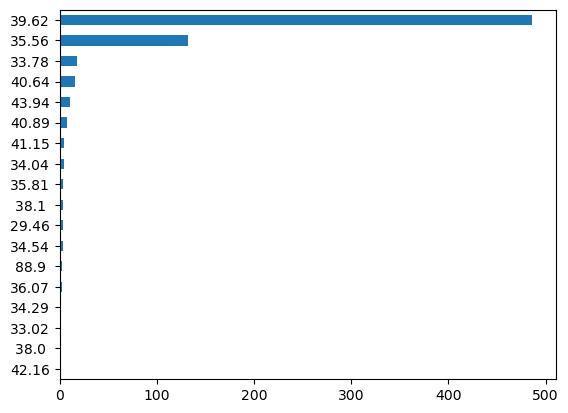

In [54]:
df['Display_cm'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

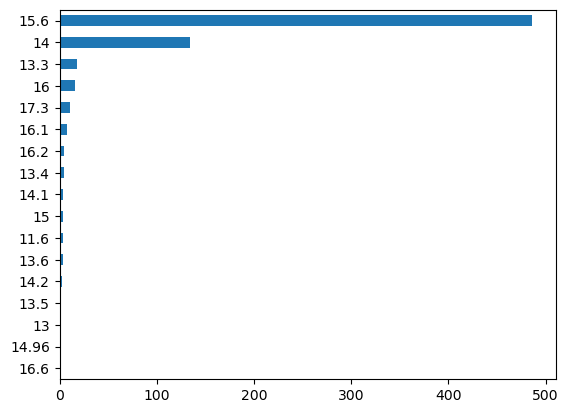

In [55]:
df['Display_inches'].value_counts().sort_values().plot(kind='barh')

BIVARIENT ANALYSIS

<AxesSubplot:title={'center':'MRP'}, xlabel='RAM_GB'>

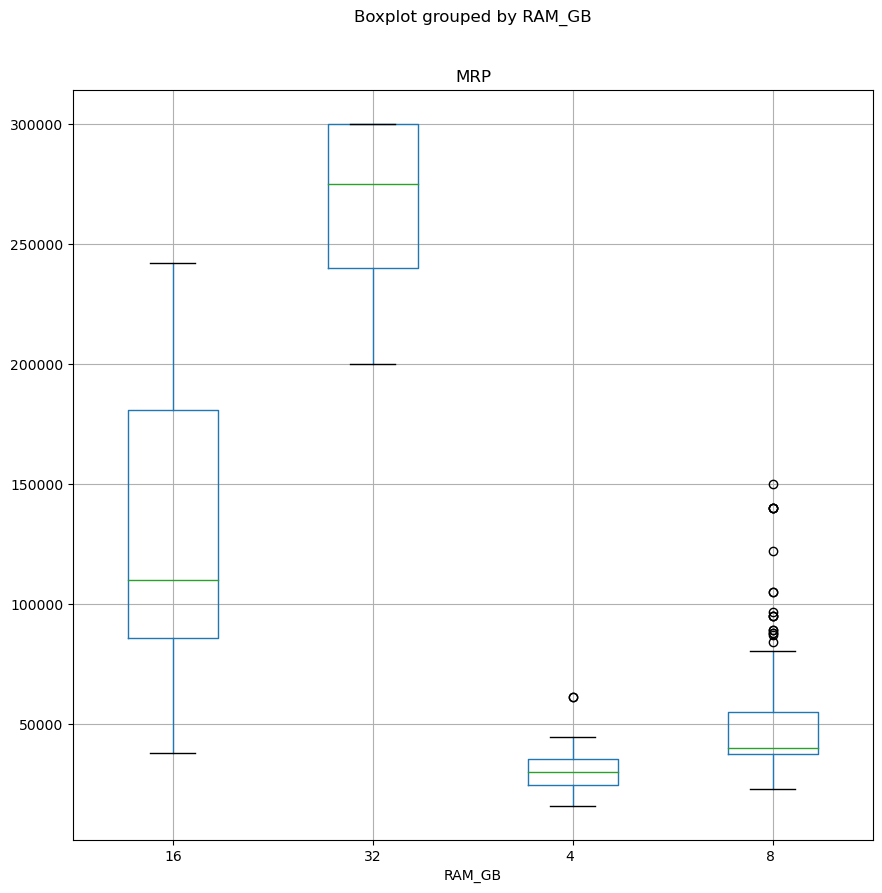

In [56]:
#MRP vs RAM
df.boxplot(by='RAM_GB',column='MRP',figsize=(10,10))

<AxesSubplot:title={'center':'MRP'}, xlabel='RAM_type'>

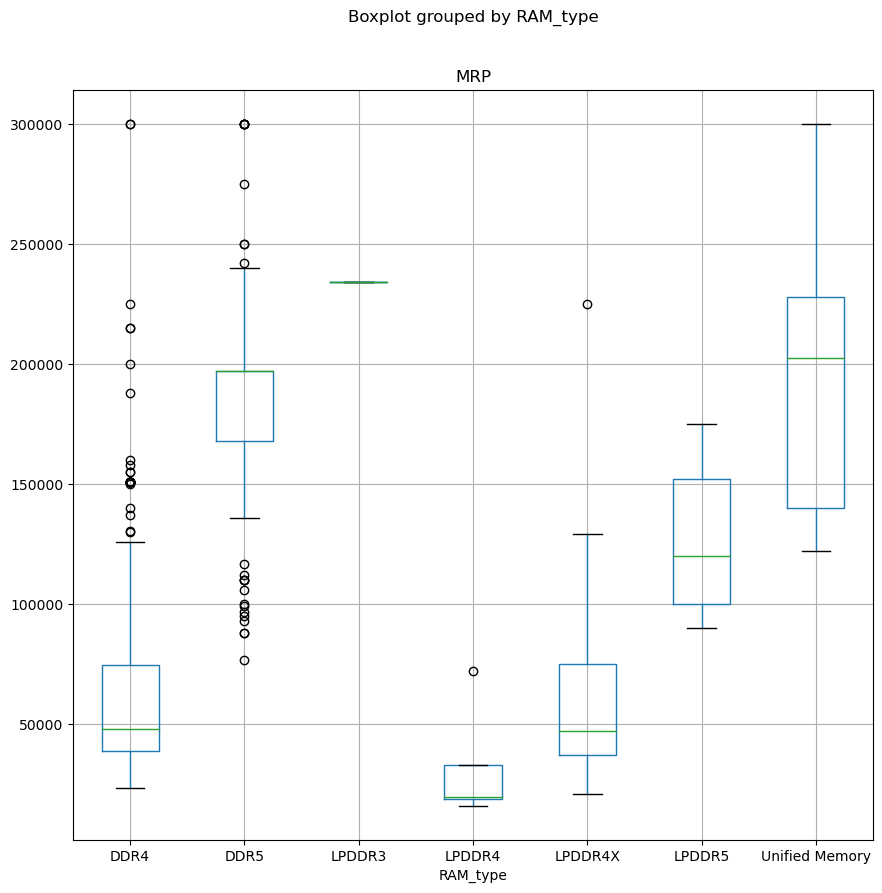

In [57]:
df.boxplot(by='RAM_type',column='MRP',figsize=(10,10))

<AxesSubplot:title={'center':'MRP'}, xlabel='Disk_Type'>

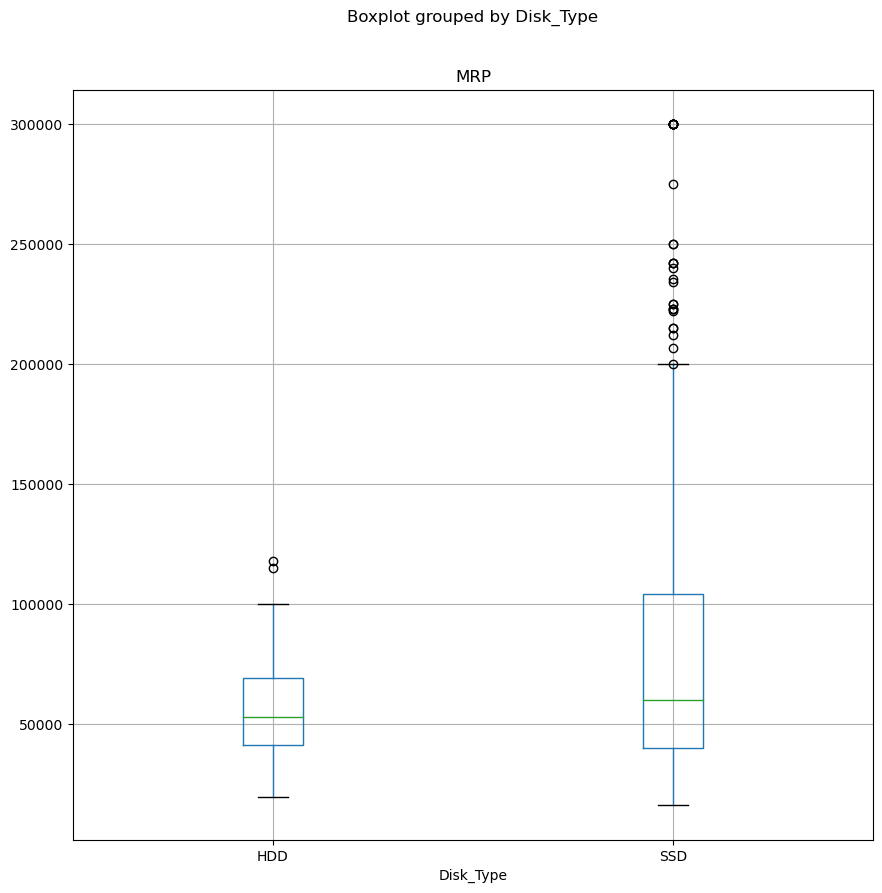

In [58]:
#MRP vs Disk
df.boxplot(by='Disk_Type',column='MRP',figsize=(10,10))

<AxesSubplot:title={'center':'MRP'}, xlabel='OS'>

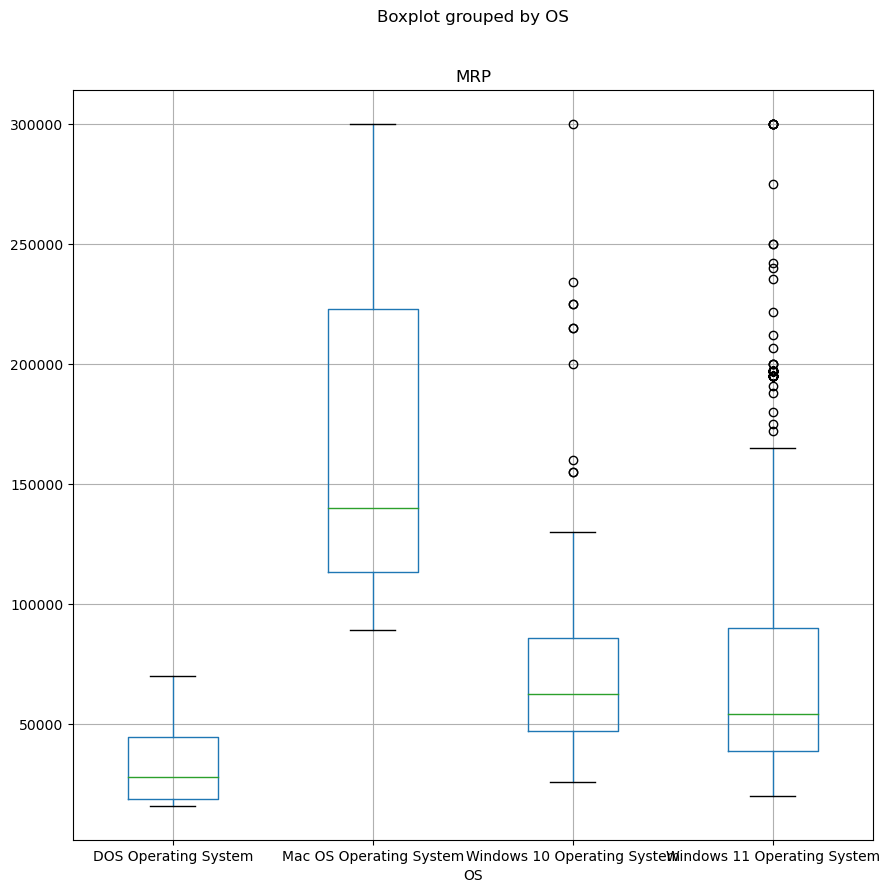

In [59]:
df.boxplot(by='OS',column='MRP',figsize=(10,10))

<AxesSubplot:title={'center':'MRP'}, xlabel='Display_inches'>

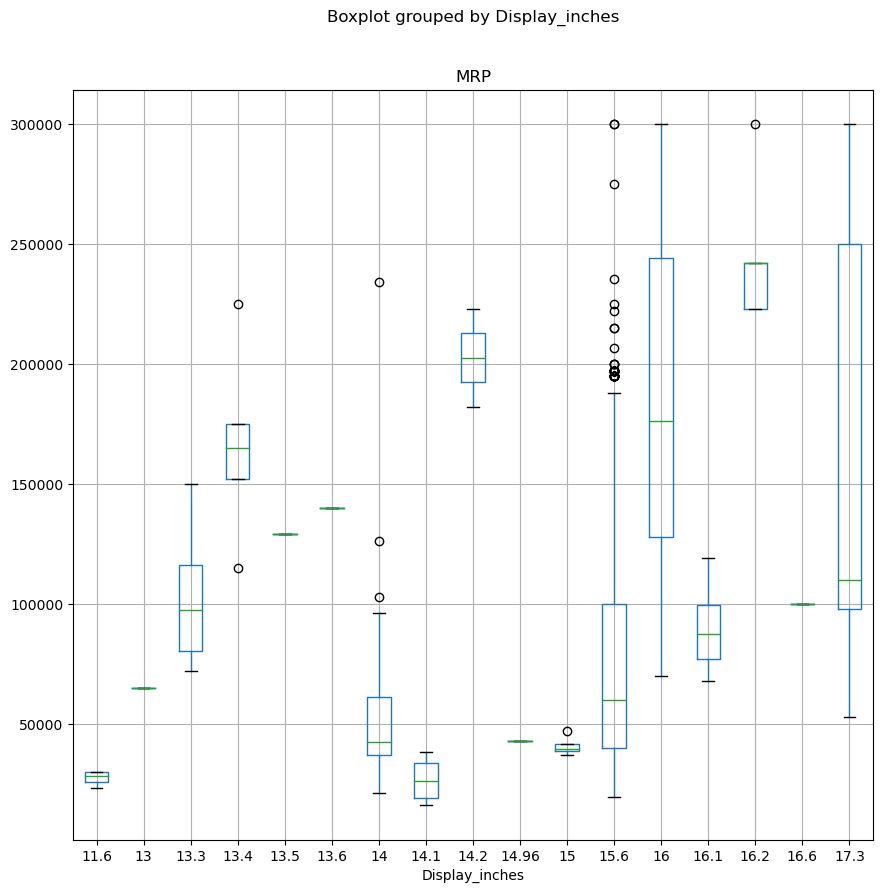

In [60]:
df.boxplot(by='Display_inches',column='MRP',figsize=(10,10))

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 719
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MRP             704 non-null    float64
 1   Feature         704 non-null    object 
 2   Processor_type  704 non-null    object 
 3   RAM             704 non-null    object 
 4   RAM_GB          704 non-null    object 
 5   RAM_type        704 non-null    object 
 6   Disk_Type       704 non-null    object 
 7   Disk_size       704 non-null    object 
 8   OS              704 non-null    object 
 9   Display_cm      704 non-null    object 
 10  Display_inches  704 non-null    object 
dtypes: float64(1), object(10)
memory usage: 66.0+ KB


In [62]:
data=df[['Processor_type','RAM_GB','RAM_type','Disk_Type','Disk_size','OS','Display_inches']]
data.to_csv('laptop_price.csv', index=False)
data.head()

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
0,Intel,8,DDR4,SSD,256,Windows 11 Operating System,14
1,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
2,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
3,AMD Ryzen,8,DDR4,SSD,512,Windows 10 Operating System,15.6
4,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6


In [63]:
X = df.drop(columns=["RAM", "Display_cm", "Feature",'MRP'])
y = df.MRP

In [64]:
X

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
0,Intel,8,DDR4,SSD,256,Windows 11 Operating System,14
1,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
2,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
3,AMD Ryzen,8,DDR4,SSD,512,Windows 10 Operating System,15.6
4,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
...,...,...,...,...,...,...,...
714,AMD Ryzen,16,DDR4,SSD,512,Windows 10 Operating System,15.6
716,AMD Ryzen,8,DDR4,SSD,512,Windows 11 Operating System,15.6
717,AMD Ryzen,16,DDR5,SSD,1024,Windows 11 Operating System,15.6
718,Intel,16,LPDDR5,SSD,512,Windows 11 Operating System,14


In [65]:
y

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
714     90000.0
716     73490.0
717    194990.0
718    125990.0
719     50990.0
Name: MRP, Length: 704, dtype: float64

In [66]:
X.columns

Index(['Processor_type', 'RAM_GB', 'RAM_type', 'Disk_Type', 'Disk_size', 'OS',
       'Display_inches'],
      dtype='object')

In [67]:
col=['Processor_type', 'RAM_GB', 'RAM_type', 'Disk_Type', 'Disk_size', 'OS','Display_inches']

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X=X[col].apply(lambda col: le.fit_transform(col))

In [69]:
data2=X[['Processor_type','RAM_GB','RAM_type','Disk_Type','Disk_size','OS','Display_inches']]
data2.to_csv('laptop_price_2.csv', index=False)
data2.head()

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
0,2,3,0,1,3,3,6
1,2,3,0,1,4,3,11
2,2,3,0,1,4,3,11
3,0,3,0,1,4,2,11
4,2,3,0,1,4,3,11


In [70]:

dic={}
for colums in data.columns:
    print(colums)
    dic.update(dict(zip(data[colums].unique(),data2[colums].unique())))

Processor_type
RAM_GB
RAM_type
Disk_Type
Disk_size
OS
Display_inches


In [71]:
print(dic)

{'Intel': 2, 'AMD Ryzen': 0, 'Apple': 1, '8 ': 3, '16': 12, '4 ': 2, '32': 1, 'DDR4': 0, 'DDR5': 1, 'LPDDR4': 3, 'Unified Memory': 6, 'LPDDR4X': 4, 'LPDDR5': 5, 'LPDDR3': 2, 'SSD': 1, 'HDD': 0, '256': 3, '512': 4, '1024': 0, '128': 1, '2048': 2, 'Windows 11 Operating System': 3, 'Windows 10 Operating System': 2, 'Mac OS Operating System': 1, 'DOS Operating System': 0, '14': 6, '15.6': 11, '17.3': 16, '13.3': 2, '14.2': 8, '13.6': 5, '16.1': 13, '16.2': 14, '14.1': 7, '13.4': 3, '15': 10, '13': 1, '14.96': 9, '13.5': 4, '11.6': 0, '16.6': 15}


In [72]:
data['Processor_type'].unique()

array(['Intel', 'AMD Ryzen', 'Apple'], dtype=object)

In [73]:
X['OS'].unique()

array([3, 2, 1, 0])

In [74]:
os=dict(zip(data['OS'].unique(),X['OS'].unique()))
os

{'Windows 11 Operating System': 3,
 'Windows 10 Operating System': 2,
 'Mac OS Operating System': 1,
 'DOS Operating System': 0}

In [75]:
# train test split
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)


In [77]:
X_train

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
355,2,3,0,1,4,2,6
161,0,0,0,1,0,3,11
156,0,3,0,1,4,3,11
80,0,0,1,1,0,3,11
9,0,0,0,1,4,3,6
...,...,...,...,...,...,...,...
591,0,0,0,1,0,3,11
55,0,3,0,1,4,3,11
357,0,3,0,1,4,3,11
81,0,0,0,1,0,3,11


In [78]:
X_test


,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
419,2,3,0,1,3,2,11
500,2,3,0,1,4,3,11
339,2,0,0,1,4,3,11
278,0,3,0,0,0,2,11
254,2,0,0,1,4,3,6
...,...,...,...,...,...,...,...
199,2,3,0,0,0,2,11
623,2,0,0,1,4,2,6
432,0,3,0,1,4,3,11
213,2,3,0,1,4,3,11


In [79]:
y_train

355     43090.0
161    150990.0
156     38705.0
80     196990.0
9       44990.0
         ...   
591     85990.0
55      37499.0
357     44990.0
81      85990.0
530     39990.0
Name: MRP, Length: 528, dtype: float64

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()
model.fit(X_train.values, y_train.values)

LinearRegression()

In [82]:
from sklearn.metrics import r2_score,mean_absolute_error

y_pred = model.predict(X_test.values)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6417187800333716
MAE 24890.816813823905


In [83]:
int(model.predict([[1,0,1,1,0,3,11]]))

156726

In [84]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [85]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test.values)

array([ 75394.09834614,  43839.47481126,  82532.29653643,  64669.92031979,
        62275.79432648,  86089.59277177,  39217.67140052,  47396.7710466 ,
        39217.67140052,  47396.7710466 , 131914.10382845,  43839.47481126,
        44907.42231648,  59474.17361048,  47396.7710466 ,  45192.69934878,
        59474.17361048, 158504.74942705, 165042.31691096, 158504.74942705,
       148628.38796865, 158504.74942705,  88291.70558786,  86089.59277177,
        83344.92064488,  47396.7710466 ,  90140.89321376, 122266.01971738,
        82532.29653643, 160991.01646897, 148628.38796865, 131036.9505615 ,
        43839.47481126,  47396.7710466 ,  27140.26883665, 148628.38796865,
        78723.11723414, 148628.38796865,  62275.79432648, 106378.27000813,
        43839.47481126,  43839.47481126,  43839.47481126,  82532.29653643,
       131914.10382845,  43839.47481126,  43839.47481126, 250101.6593987 ,
        84240.40514587,  43839.47481126,  86089.59277177, 158504.74942705,
       129217.83957739,  

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 719
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Processor_type  704 non-null    int32
 1   RAM_GB          704 non-null    int32
 2   RAM_type        704 non-null    int32
 3   Disk_Type       704 non-null    int32
 4   Disk_size       704 non-null    int32
 5   OS              704 non-null    int32
 6   Display_inches  704 non-null    int32
dtypes: int32(7)
memory usage: 24.8 KB
